# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
import json
import requests
from api_key import weather_api_key
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key +"&q="

#Cities weather data frame
Cities_DF = pd.DataFrame({"City":cities})
Cities_DF["Temperature(C)"] =""
Cities_DF["Humidity(%)"] =""
Cities_DF["Cloudiness(%)"] =""
Cities_DF["Wind Speed(kph)"] =""
Cities_DF["Latitude"]=""
Cities_DF["Longitude"]=""
Cities_DF.head()
print("Beginning Data Retrieval")
print("------------------------")

#Cities weather data frame
Cities_DF = pd.DataFrame({"City":cities})
Cities_DF["Temperature(C)"] =""
Cities_DF["Humidity(%)"] =""
Cities_DF["Cloudiness(%)"] =""
Cities_DF["Wind Speed(kph)"] =""
Cities_DF["Latitude"]=""
Cities_DF["Longitude"]=""
Cities_DF.head()
print("Beginning Data Retrieval")
print("------------------------")

for index, row in Cities_DF.iterrows():
    city =row["City"]
    response = requests.get(url+city)
    city_weather = response.json()
    print(f"Processing Record {index} | {city}")
    city_weather_url =response.url
    print(response.url)

    
    try:
        Cities_DF.loc[index,"Temperature(C)"]=city_weather['main']['temp']
        Cities_DF.loc[index,"Humidity(%)"]=city_weather['main']['humidity']
        Cities_DF.loc[index,"Cloudiness(%)"]=city_weather['clouds']['all']
        Cities_DF.loc[index,"Wind Speed(kph)"]=city_weather['wind']['speed']
        Cities_DF.loc[index,"Latitude"]=city_weather['coord']['lat']
        Cities_DF.loc[index,"Longitude"]=city_weather["coord"]['lon']
        
    except (KeyError, IndexError):
        print(f"City not found... skipping.")

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

print(Cities_DF)

Beginning Data Retrieval
------------------------
Beginning Data Retrieval
------------------------
Processing Record 0 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=punta%20arenas
Processing Record 1 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=mys%20shmidta
City not found... skipping.
Processing Record 2 | olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=olafsvik
Processing Record 3 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=richards%20bay
Processing Record 4 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=yellowknife
Processing Record 5 | mareeba
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=ma

Processing Record 56 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=jamestown
Processing Record 57 | ust-tsilma
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=ust-tsilma
Processing Record 58 | tahoua
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=tahoua
Processing Record 59 | zanjan
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=zanjan
Processing Record 60 | tautira
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=tautira
Processing Record 61 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=mar%20del%20plata
Processing Record 62 | avera
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=avera
Pr

Processing Record 113 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=ostrovnoy
Processing Record 114 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=khatanga
Processing Record 115 | vao
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=vao
Processing Record 116 | saucillo
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=saucillo
Processing Record 117 | marawi
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=marawi
Processing Record 118 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=severo-kurilsk
Processing Record 119 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=provi

Processing Record 170 | coaticook
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=coaticook
Processing Record 171 | lufilufi
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=lufilufi
Processing Record 172 | bonavista
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=bonavista
Processing Record 173 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=dikson
Processing Record 174 | chkalovskoye
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=chkalovskoye
Processing Record 175 | mount isa
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=mount%20isa
Processing Record 176 | sorvag
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&

Processing Record 227 | diffa
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=diffa
Processing Record 228 | gushikawa
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=gushikawa
Processing Record 229 | raudeberg
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=raudeberg
Processing Record 230 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=attawapiskat
City not found... skipping.
Processing Record 231 | sampit
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=sampit
Processing Record 232 | abu jubayhah
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=abu%20jubayhah
City not found... skipping.
Processing Record 233 | opuwo
http://api.openweathermap.org/data/2.5/weath

Processing Record 284 | puerto madero
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=puerto%20madero
Processing Record 285 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=tiksi
Processing Record 286 | rawson
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=rawson
Processing Record 287 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=amderma
City not found... skipping.
Processing Record 288 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=petropavlovsk-kamchatskiy
Processing Record 289 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=katsuura
Processing Record 290 | machesney park
http://api.openweathermap.org/data/2.5/we

Processing Record 340 | koltsovo
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=koltsovo
Processing Record 341 | dig
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=dig
Processing Record 342 | salym
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=salym
Processing Record 343 | bolkhov
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=bolkhov
Processing Record 344 | inta
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=inta
Processing Record 345 | sabzevar
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=sabzevar
Processing Record 346 | haines junction
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=haines%20junction
Processin

Processing Record 397 | dubenskiy
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=dubenskiy
City not found... skipping.
Processing Record 398 | genhe
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=genhe
Processing Record 399 | tabiauea
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=tabiauea
City not found... skipping.
Processing Record 400 | zhanaozen
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=zhanaozen
Processing Record 401 | coper
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=coper
Processing Record 402 | saiha
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=saiha
Processing Record 403 | launceston
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID

Processing Record 454 | taman
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=taman
Processing Record 455 | belle fourche
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=belle%20fourche
Processing Record 456 | krasnoselkup
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=krasnoselkup
Processing Record 457 | la paz
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=la%20paz
Processing Record 458 | samalaeulu
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=samalaeulu
City not found... skipping.
Processing Record 459 | azimur
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=azimur
City not found... skipping.
Processing Record 460 | pangnirtung
http://api.openweathermap.org/data/2.5

Processing Record 511 | parana
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=parana
Processing Record 512 | ust-nera
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=ust-nera
Processing Record 513 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=laguna
Processing Record 514 | grand-santi
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=grand-santi
Processing Record 515 | shostka
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=shostka
Processing Record 516 | faya
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=faya
Processing Record 517 | bowen
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=bowen
Processing Record

Processing Record 568 | sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=sisimiut
Processing Record 569 | lianyuan
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=lianyuan
Processing Record 570 | rundu
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=rundu
Processing Record 571 | abbeville
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=abbeville
Processing Record 572 | naliya
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=naliya
Processing Record 573 | lokosovo
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=lokosovo
Processing Record 574 | bhuj
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=bhuj
Processing Reco

Processing Record 625 | anloga
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=74eb9327a027879faefa9f9491adc2b3&q=anloga
------------------------
Data Retrieval Complete
------------------------
             City Temperature(C) Humidity(%) Cloudiness(%) Wind Speed(kph)  \
0    punta arenas           4.06          81             0            6.17   
1     mys shmidta                                                            
2        olafsvik           9.15          76           100            6.96   
3    richards bay          19.37          59           100             6.8   
4     yellowknife          17.29          63            20            2.06   
..            ...            ...         ...           ...             ...   
621     shelburne          15.26          57            10            3.24   
622       ahipara          13.96          74            58            4.44   
623   sao gotardo          10.35          65            91            1.39   
624    

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
Cities_DF.replace('', np.nan, inplace=True)
Cities_DF.dropna(axis=0, inplace=True)
#Cities_DF.to_csv('city_data_output.csv')
Cities_DF

,City,Temperature(C),Humidity(%),Cloudiness(%),Wind Speed(kph),Latitude,Longitude
0,punta arenas,4.06,81.0,0.0,6.17,-53.1500,-70.9167
2,olafsvik,9.15,76.0,100.0,6.96,64.8945,-23.7142
3,richards bay,19.37,59.0,100.0,6.80,-28.7830,32.0377
4,yellowknife,17.29,63.0,20.0,2.06,62.4560,-114.3525
5,mareeba,23.57,77.0,52.0,2.89,-17.0000,145.4333
...,...,...,...,...,...,...,...
620,zhob,36.21,8.0,0.0,0.69,31.3411,69.4481
621,shelburne,15.26,57.0,10.0,3.24,44.0787,-80.2041
622,ahipara,13.96,74.0,58.0,4.44,-35.1667,173.1667
623,sao gotardo,10.35,65.0,91.0,1.39,-19.3111,-46.0489


In [18]:
Cities_DF.describe()

,Temperature(C),Humidity(%),Cloudiness(%),Wind Speed(kph),Latitude,Longitude
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,20.065390,68.734835,55.466205,3.412149,20.127880,18.258559
std,8.741926,23.337516,41.392674,2.236208,32.956735,92.477677
min,-4.940000,1.000000,0.000000,0.000000,-54.800000,-175.200000
25%,13.490000,56.000000,8.000000,1.670000,-6.134900,-61.633300
50%,21.230000,75.000000,67.000000,3.000000,22.890900,23.029700
75%,26.480000,87.000000,100.000000,4.740000,48.932900,102.533300
max,44.370000,100.000000,100.000000,12.960000,78.218600,179.316700


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
cities_hum100 = Cities_DF["Humidity(%)"] >100
cities_hum100.value_counts()

False    577
Name: Humidity(%), dtype: int64

In [20]:
#  Get the indices of cities that have humidity over 100%.
cities_hum100.index

Int64Index([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            615, 616, 617, 618, 619, 620, 621, 622, 623, 625],
           dtype='int64', length=577)

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

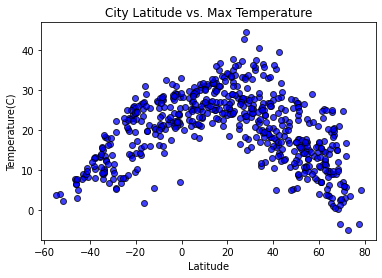

In [60]:
#CSV created from random generator above. Saved to csv and used to plot graphs below
plot_df = pd.read_csv("city_data_output.csv")

#Scatter plots created for latitude vs Temperature
x_values = plot_df['Latitude']
y_values = plot_df['Temperature(C)']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')
plt.savefig("Images/temperature.png")
plt.show()

## Latitude vs. Humidity Plot

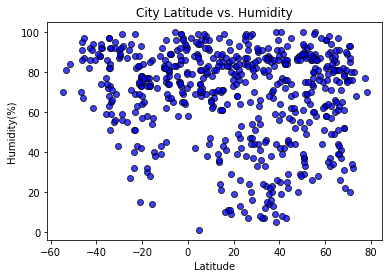

In [61]:
#Scatter plots created for latitude vs Humidity
plot_df = pd.read_csv("city_data_output.csv")

x_values = plot_df['Latitude']
y_values = plot_df['Humidity(%)']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.savefig("Images/humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

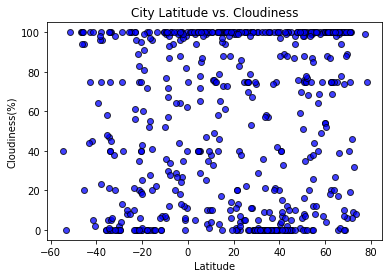

In [62]:
#Scatter plots created for latitude vs Cloudiness
x_values = plot_df['Latitude']
y_values = plot_df['Cloudiness(%)']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig("Images/cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

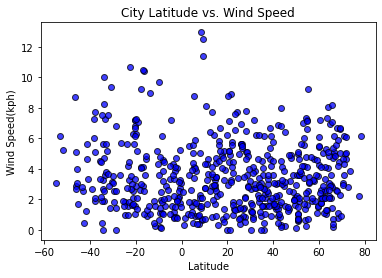

In [63]:
#Scatter plots created for latitude vs Wind Speed
x_values = plot_df['Latitude']
y_values = plot_df['Wind Speed(kph)']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(kph)')
plt.savefig("Images/wind_speed.png")
plt.show()

## Linear Regression

In [29]:
# Create Northern and Southern Hemisphere DataFrames
#pull loc above and below the equator; note any cities directly on the equator (i.e. latitude = 0) are excluded
northern_df = plot_df.loc[plot_df["Latitude"] > 0]
southern_df = plot_df.loc[plot_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4832868889107109


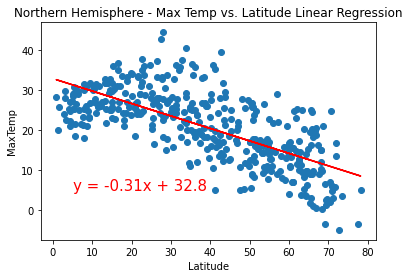

In [72]:
#import scipy to create linear regression line
from scipy.stats import linregress

#defining x and y axis values
x_values = northern_df['Latitude']
y_values = northern_df['Temperature(C)']

#Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('MaxTemp')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/max_temp_linregress.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5448191683042137


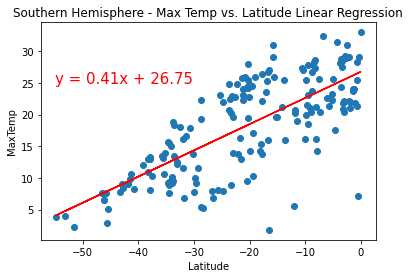

In [73]:
#defining x and y axis values
x_values = southern_df['Latitude']
y_values = southern_df['Temperature(C)']

#Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('MaxTemp')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/sth_max_temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0004331465469983568


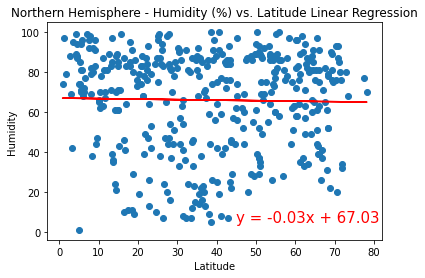

In [74]:
x_values = northern_df['Latitude']
y_values = northern_df['Humidity(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/nth_humidity_lr.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00262978394193502


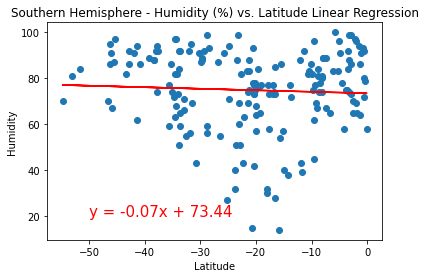

In [75]:
x_values = southern_df['Latitude']
y_values = southern_df['Humidity(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/sth_humidity_lr.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0010030990358975797


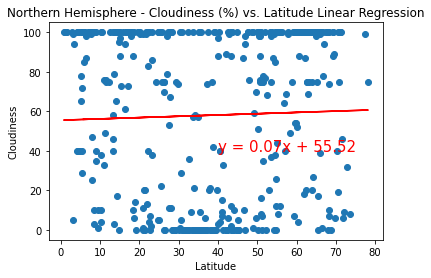

In [76]:
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/nth_cloudiness_lr.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002786853087188205


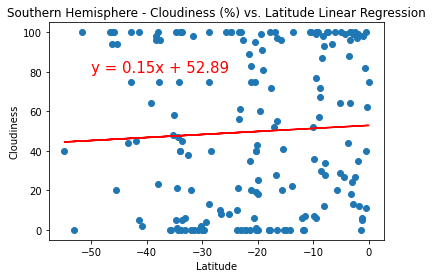

In [77]:
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/sth_cloudiness_lr.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001216048649743573


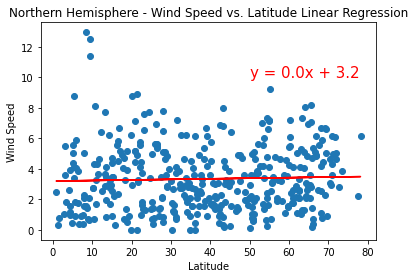

In [78]:
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed(kph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/nt_windspeed_lr.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03886667114131286


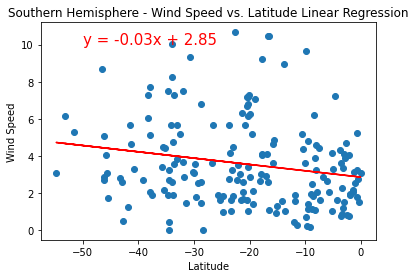

In [79]:
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed(kph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/sth_windspeed_lr.png")
plt.show()

## Observations

1. There's a negative correlation between max temp and latitude for the Northern Hemisphere and positive correlation for the two variables in the Southern Hemisphere. This makes sense as the closer the city is to the equator, the hotter and/or more tropical weather the city experiences. 

2. The above can be determined that there's a normal distribution between temperature and latitude. As seen by the scatter plot for Latitude vs Tempereature, the plot has depicted a bell shape curve. 

3. There's very small correlation between wind speed, cloudiness and humidity when compared against the latitude for both hemispheres. 